# Data management


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from models.candlestick import Candlestick

candlestick = Candlestick()

bitcoin_prices = candlestick.to_df()

type(bitcoin_prices)


def logDiff(x):
    x_diff = 100*np.log(x/x.shift(1))
    return x_diff

def changeDiff(x):
    x_diff = np.diff(x) / x[:-1] * 100
    return x_diff

## Data description and calculation

### Describe data


In [2]:
bitcoin_prices.head(10)

bitcoin_prices['open'].mean()

bitcoin_prices.describe()

,date,open,high,close,low,volumn,atr14
count,0,0,0,0,0,0,0
unique,0,0,0,0,0,0,0
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
bitcoin_prices.corr()

In [5]:
df = pd.DataFrame([(.2,.3), (.0,.6), (.6, .0), (.2, .1)], columns=['dogs', 'cats'])

print(df)

print(df.describe())

df.corr()

   dogs  cats
0   0.2   0.3
1   0.0   0.6
2   0.6   0.0
3   0.2   0.1
           dogs      cats
count  4.000000  4.000000
mean   0.250000  0.250000
std    0.251661  0.264575
min    0.000000  0.000000
25%    0.150000  0.075000
50%    0.200000  0.200000
75%    0.300000  0.375000
max    0.600000  0.600000


,dogs,cats
dogs,1.000000,-0.851064
cats,-0.851064,1.000000


### Internal rate of return



In [6]:
cashflow = pd.Series(index=[0, 1, 2, 3, 4,5], name='Cashflow', data=[-107,5,5,5,5,105])

print(cashflow)

#irr lai suat hoan von noi bo (research)
np.irr(cashflow)

0   -107
1      5
2      5
3      5
4      5
5    105
Name: Cashflow, dtype: int64


0.034517484085994976

In [3]:
data = pd.read_excel("data/UKHP.xls", index_col=0)
data.describe()
print(data)

            Average House Price
Month                          
1991-01-01         53051.721106
1991-02-01         53496.798746
1991-03-01         52892.861606
1991-04-01         53677.435270
1991-05-01         54385.726747
...                         ...
2013-01-01        162245.246160
2013-02-01        162637.554736
2013-03-01        164630.410711
2013-04-01        165586.075968
2013-05-01        167911.570786

[269 rows x 1 columns]


In [10]:
data['dhp'] = logDiff(data['Average House Price'])
data['chp'] = changeDiff(data['Average House Price'])
print(data['Average House Price'])
print('____________________')
print(data['dhp'])
print('____________________')
print(data['chp'])

Month
1991-01-01     53051.721106
1991-02-01     53496.798746
1991-03-01     52892.861606
1991-04-01     53677.435270
1991-05-01     54385.726747
                  ...      
2013-01-01    162245.246160
2013-02-01    162637.554736
2013-03-01    164630.410711
2013-04-01    165586.075968
2013-05-01    167911.570786
Name: Average House Price, Length: 269, dtype: float64
____________________
Month
1991-01-01         NaN
1991-02-01    0.835451
1991-03-01   -1.135343
1991-04-01    1.472432
1991-05-01    1.310903
                ...   
2013-01-01   -0.010444
2013-02-01    0.241508
2013-03-01    1.217889
2013-04-01    0.578813
2013-05-01    1.394632
Name: dhp, Length: 269, dtype: float64
____________________
Month
1991-01-01    0.838950
1991-02-01   -1.128922
1991-03-01    1.483326
1991-04-01    1.319533
1991-05-01    1.326908
                ...   
2013-01-01    0.241800
2013-02-01    1.225336
2013-03-01    0.580491
2013-04-01    1.404402
2013-05-01         NaN
Name: chp, Length: 269, dtype: f

In [19]:
data['dhp'] = logDiff(data['Average House Price'])
print(data['Average House Price'])
print('__________')
print(data['Average House Price'].shift(1))
print('__________')
print(data['dhp'])

Month
1991-01-01     53051.721106
1991-02-01     53496.798746
1991-03-01     52892.861606
1991-04-01     53677.435270
1991-05-01     54385.726747
                  ...      
2013-01-01    162245.246160
2013-02-01    162637.554736
2013-03-01    164630.410711
2013-04-01    165586.075968
2013-05-01    167911.570786
Name: Average House Price, Length: 269, dtype: float64
__________
Month
1991-01-01              NaN
1991-02-01     53051.721106
1991-03-01     53496.798746
1991-04-01     52892.861606
1991-05-01     53677.435270
                  ...      
2013-01-01    162262.191136
2013-02-01    162245.246160
2013-03-01    162637.554736
2013-04-01    164630.410711
2013-05-01    165586.075968
Name: Average House Price, Length: 269, dtype: float64
__________
Month
1991-01-01         NaN
1991-02-01    0.835451
1991-03-01   -1.135343
1991-04-01    1.472432
1991-05-01    1.310903
                ...   
2013-01-01   -0.010444
2013-02-01    0.241508
2013-03-01    1.217889
2013-04-01    0.578813
2013

### Plots


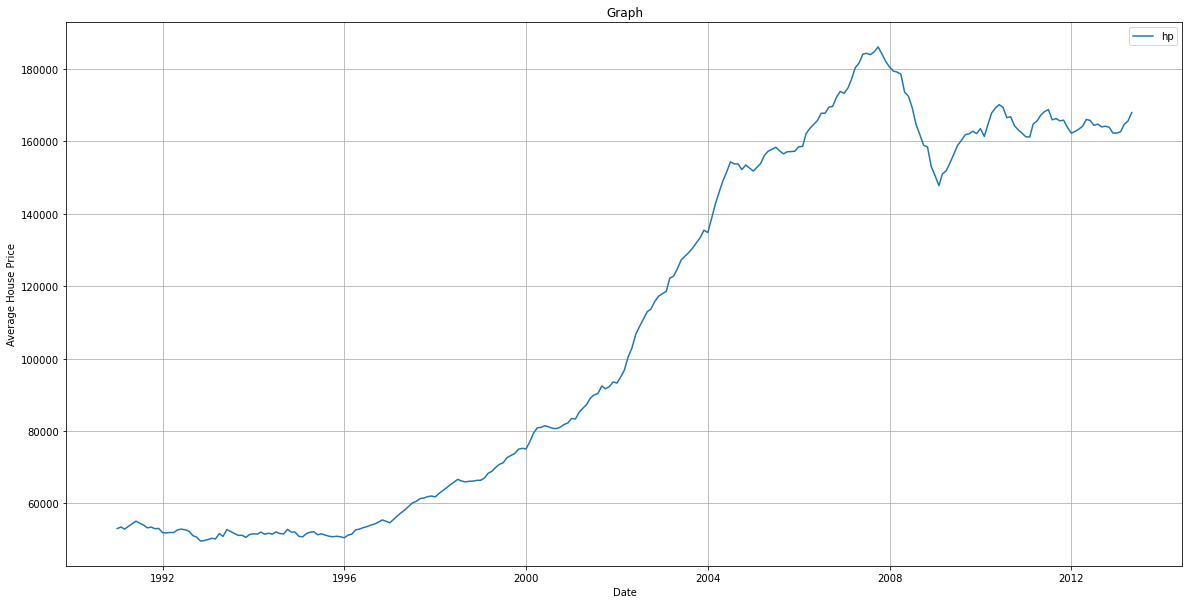

In [10]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(20,10))

plt.plot(data['Average House Price'], label='hp')

plt.xlabel('Date')
plt.ylabel('Average House Price')
plt.title('Graph')
plt.grid(True)

plt.legend()
plt.show()

### Simple linear regression


                            OLS Regression Results                            
Dep. Variable:                   Spot   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.818e+05
Date:                Thu, 18 Feb 2021   Prob (F-statistic):          4.38e-223
Time:                        12:28:09   Log-Likelihood:                -385.99
No. Observations:                 135   AIC:                             776.0
Df Residuals:                     133   BIC:                             781.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.4943      2.276      2.414      0.0

<AxesSubplot:xlabel='Spot', ylabel='Futures'>

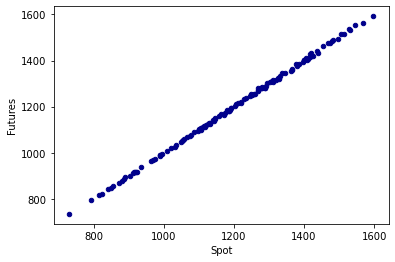

In [12]:
import statsmodels.formula.api as smf

data = pd.read_excel("data/SandPhedge.xls", index_col=0)

formula = 'Spot ~ Futures'

results = smf.ols(formula, data).fit()

print(results.summary())

data.plot.scatter(x='Spot', y='Futures', c='DarkBlue')

# plt.figure(figsize=(20,10))
# plt.scatter(pd['Spot'],pd['Futures'], label='skitscat', color='k', s=25, marker="o")

# plt.xlabel('x')
# plt.ylabel('y')
# plt.title('Interesting Graph\nCheck it out')
# plt.legend()
# plt.show()